# Описание задачи

По признакам, перечисленным далее, требуется предсказать стоимость машины.

# Чтение данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from google.colab import drive


drive.mount('/content/drive')
file_path = '/content/drive/My Drive/cardekho.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


# Визуализация данных

In [2]:
entities, features = df.shape
print(f"Entities: {entities}")
print(f"Features: {features}")
print("\n\n")

df.info()

Entities: 8128
Features: 12



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


Категориальные признаки:
- name
- fuel
- seller_type
- owner

Бинарные признаки:
- transmission

Количественные признаки:
- year
- selling_price
- km_driven
- mileage(km/ltr/kg)
- engine
- max_power
- seats

In [27]:
categorical_features = [
  'name',
  'fual',
  'seller_type',
  'owner'
]

numerical_features = [
  'year',
  'selling_price',
  'km_driven',
  'mileage(km/ltr/kg)',
  'engine',
  'max_power',
  'seats'
]


In [33]:
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')
df['max_power'].fillna(df['max_power'].mean(), inplace=True)

df['seats'].fillna(df['seats'].mean(), inplace=True)
df['mileage(km/ltr/kg)'].fillna(df['mileage(km/ltr/kg)'].mean(), inplace=True)
df['engine'].fillna(df['engine'].mean(), inplace=True)

df.transmission.unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   name                8128 non-null   category
 1   year                8128 non-null   float64 
 2   selling_price       8128 non-null   float64 
 3   km_driven           8128 non-null   float64 
 4   fuel                8128 non-null   category
 5   seller_type         8128 non-null   category
 6   transmission        8128 non-null   object  
 7   owner               8128 non-null   category
 8   mileage(km/ltr/kg)  8128 non-null   float64 
 9   engine              8128 non-null   float64 
 10  max_power           8128 non-null   float64 
 11  seats               8128 non-null   float64 
dtypes: category(4), float64(7), object(1)
memory usage: 629.0+ KB


In [34]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006.0,158000.0,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007.0,130000.0,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013.0,320000.0,110000.0,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007.0,135000.0,119000.0,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009.0,382000.0,120000.0,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
8126,Tata Indigo CR4,2013.0,290000.0,25000.0,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


In [35]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.000000,8128.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,91.517919,5.416719
std,4.044249,8.062534e+05,5.655055e+04,3.981875,497.017504,35.343246,0.946450
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.800000,1197.000000,68.100000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.418783,1248.000000,83.100000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.277500,1582.000000,101.250000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [36]:
df['name'] = df['name'].astype('category')
df['fuel'] = df['fuel'].astype('category')
df['seller_type'] = df['seller_type'].astype('category')
df['owner'] = df['owner'].astype('category')

df.describe(include=['category'])

,name,fuel,seller_type,owner
count,8128,8128,8128,8128
unique,2058,4,3,5
top,Maruti Swift Dzire VDI,Diesel,Individual,First Owner
freq,129,4402,6766,5289


In [37]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),0
engine,0


Пропущенных значений нет

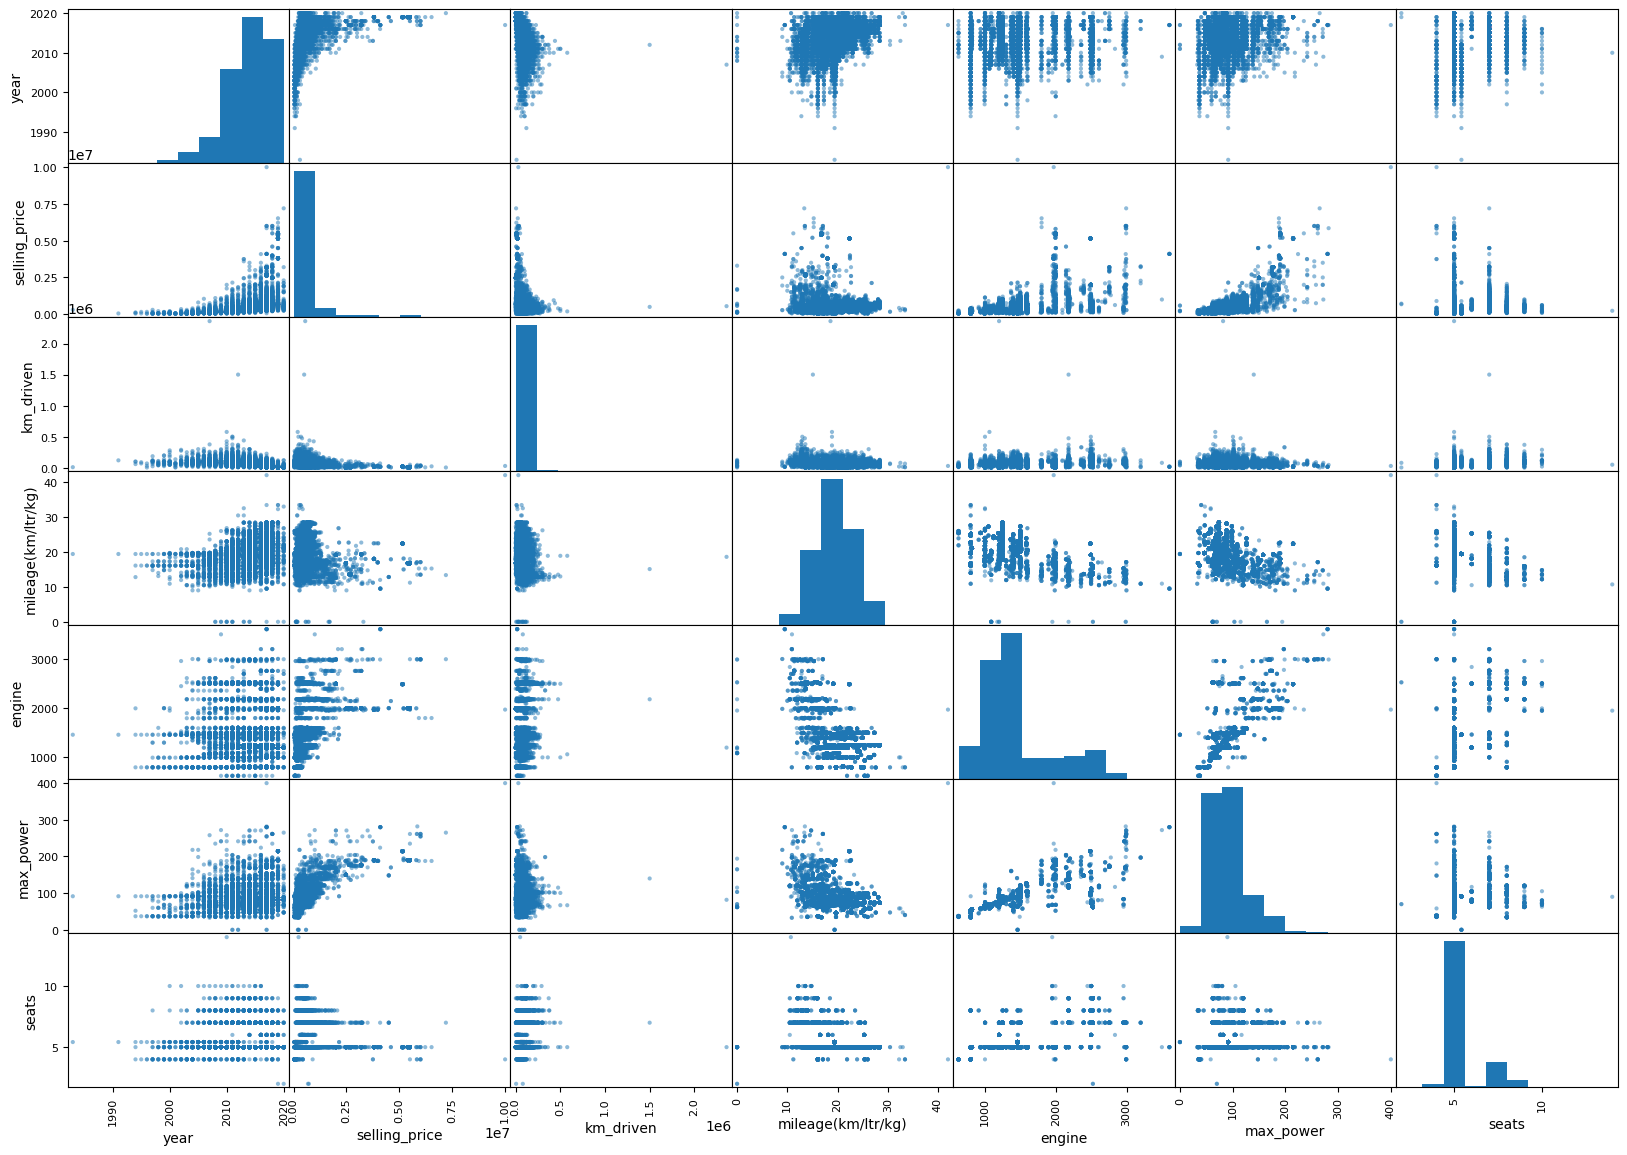

In [38]:
pd.plotting.scatter_matrix(df, figsize = (20, 14))
pass

Корреляция

In [39]:
corr_mat = df.corr(numeric_only=True)
corr_mat

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats
year,1.000000,0.414092,-0.418006,0.310383,0.017773,0.213282,-0.008623
selling_price,0.414092,1.000000,-0.225534,-0.125454,0.453567,0.744958,0.041161
km_driven,-0.418006,-0.225534,1.000000,-0.171426,0.203954,-0.037714,0.225172
mileage(km/ltr/kg),0.310383,-0.125454,-0.171426,1.000000,-0.575831,-0.373586,-0.452085
engine,0.017773,0.453567,0.203954,-0.575831,1.000000,0.702152,0.610309
max_power,0.213282,0.744958,-0.037714,-0.373586,0.702152,1.000000,0.191435
seats,-0.008623,0.041161,0.225172,-0.452085,0.610309,0.191435,1.000000


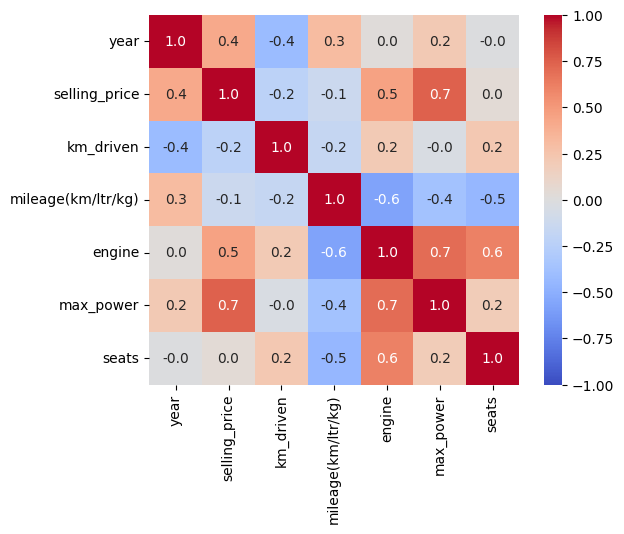

In [40]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.1f', vmin=-1, vmax=1, cmap='coolwarm')
pass

Присутствуют зависимости признаков. Чем больше крутящий момент, тем больше цена продажи и т.д.

# Обработка категориальных признаков и нормализация

In [50]:
data = df
numeric_cols = data.select_dtypes(include='number').columns
rows_to_drop = []
for name in numeric_cols:
    rows_to_drop.append(data[(data[name] < data[name].quantile(0.005)) | (data[name] > data[name].quantile(0.995))].index)

for row in rows_to_drop:
    data_new = data.drop(row)

data_new.describe()



,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats
count,8106.000000,8.106000e+03,8.106000e+03,8106.000000,8106.000000,8106.000000,8106.000000
mean,2013.810634,6.389957e+05,6.969757e+04,19.438688,1456.147808,91.562490,5.405761
std,4.038988,8.071631e+05,5.648211e+04,3.963486,495.205682,35.377836,0.914803
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,4.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.800000,1197.000000,68.100000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.418783,1248.000000,83.100000,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,22.300000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,9.000000


In [51]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8106 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   name                8106 non-null   category
 1   year                8106 non-null   float64 
 2   selling_price       8106 non-null   float64 
 3   km_driven           8106 non-null   float64 
 4   fuel                8106 non-null   category
 5   seller_type         8106 non-null   category
 6   transmission        8106 non-null   object  
 7   owner               8106 non-null   category
 8   mileage(km/ltr/kg)  8106 non-null   float64 
 9   engine              8106 non-null   float64 
 10  max_power           8106 non-null   float64 
 11  seats               8106 non-null   float64 
dtypes: category(4), float64(7), object(1)
memory usage: 690.7+ KB


In [95]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
X = data_new.drop(['selling_price', 'name'], axis=1)
XX = data_new.drop(['name'], axis=1)
enc.fit(X[['fuel', 'seller_type', 'transmission', 'owner']])
dummies = pd.DataFrame(enc.transform(X[['fuel', 'seller_type', 'transmission', 'owner']]),
                       columns=enc.get_feature_names_out(), index=X.index)

X = pd.concat((X, dummies), axis=1).drop(['fuel', 'seller_type', 'transmission', 'owner'], axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X= pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)
X.head()
X.describe()

,year,km_driven,mileage(km/ltr/kg),engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
count,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03,8.106000e+03
mean,2.566579e-14,8.415014e-17,-6.539167e-16,-2.866364e-16,1.735597e-16,-2.296598e-16,-1.402502e-17,1.577815e-17,-5.872978e-17,1.051877e-17,8.415014e-17,-1.384971e-16,2.805005e-17,-1.051877e-17,-2.191410e-17,5.829150e-17,-5.916807e-17,-2.629692e-17,2.016097e-17
std,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00
min,-7.628775e+00,-1.234034e+00,-4.904745e+00,-1.680512e+00,-2.588291e+00,-1.536775e+00,-8.415239e-02,-1.084216e+00,-6.862919e-02,-9.007756e-01,-4.016442e-01,-2.225206e+00,-1.731684e-01,-2.592296e+00,-1.365027e+00,-1.476741e-01,-5.911224e-01,-2.484367e-02,-2.708469e-01
25%,-6.959187e-01,-6.143487e-01,-6.657902e-01,-5.233458e-01,-6.632384e-01,-4.435768e-01,-8.415239e-02,-1.084216e+00,-6.862919e-02,-9.007756e-01,-4.016442e-01,4.493966e-01,-1.731684e-01,3.857584e-01,-1.365027e+00,-1.476741e-01,-5.911224e-01,-2.484367e-02,-2.708469e-01
50%,2.944894e-01,-1.717033e-01,-5.022196e-03,-4.203519e-01,-2.392179e-01,-4.435768e-01,-8.415239e-02,9.223258e-01,-6.862919e-02,-9.007756e-01,-4.016442e-01,4.493966e-01,-1.731684e-01,3.857584e-01,7.325861e-01,-1.476741e-01,-5.911224e-01,-2.484367e-02,-2.708469e-01
75%,7.896935e-01,4.834118e-01,7.219627e-01,2.541569e-01,2.950478e-01,-4.435768e-01,-8.415239e-02,9.223258e-01,-6.862919e-02,1.110154e+00,-4.016442e-01,4.493966e-01,-1.731684e-01,3.857584e-01,7.325861e-01,-1.476741e-01,1.691697e+00,-2.484367e-02,-2.708469e-01
max,1.532500e+00,4.055976e+01,5.692641e+00,4.337561e+00,8.718920e+00,3.929217e+00,1.188320e+01,9.223258e-01,1.457106e+01,1.110154e+00,2.489766e+00,4.493966e-01,5.774726e+00,3.857584e-01,7.325861e-01,6.771668e+00,1.691697e+00,4.025171e+01,3.692123e+00


In [96]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8106 entries, 0 to 8127
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          8106 non-null   float64
 1   km_driven                     8106 non-null   float64
 2   mileage(km/ltr/kg)            8106 non-null   float64
 3   engine                        8106 non-null   float64
 4   max_power                     8106 non-null   float64
 5   seats                         8106 non-null   float64
 6   fuel_CNG                      8106 non-null   float64
 7   fuel_Diesel                   8106 non-null   float64
 8   fuel_LPG                      8106 non-null   float64
 9   fuel_Petrol                   8106 non-null   float64
 10  seller_type_Dealer            8106 non-null   float64
 11  seller_type_Individual        8106 non-null   float64
 12  seller_type_Trustmark Dealer  8106 non-null   float64
 13  transmis

# Создание тестовой и обучающей выборки

In [97]:
from sklearn.model_selection import train_test_split
y = data_new['selling_price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = x_train.shape
N_test,  _ = x_test.shape

print('Размер тренировочной выборки', N_train)
print('Размер тестовой выборки', N_test)

Размер тренировочной выборки 6079
Размер тестовой выборки 2027


# Модели

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Линейная регрессия

In [99]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

y_pred_linear = linear_model.predict(x_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Линейная регрессия:")
print(f"Среднеквадратичная ошибка (MSE): {mse_linear}")
print(f"Средняя абсолютная ошибка (MAE): {mae_linear}")
print(f"Коэффициент детерминации (R²): {r2_linear}")

Линейная регрессия:
Среднеквадратичная ошибка (MSE): 192186333501.7434
Средняя абсолютная ошибка (MAE): 268034.67562028253
Коэффициент детерминации (R²): 0.6707965415311974


In [100]:
linear_model_coefs = list(linear_model.coef_)
linear_feature_coef = {feat : coef for feat, coef in
                       zip(x_train.columns, linear_model_coefs)}

linear_feature_coef = dict(sorted(linear_feature_coef.items(),
                                  key=lambda item: abs(item[1]),
                                  reverse=True))
linear_feature_coef

{'max_power': 449933.23603733984,
 'transmission_Manual': -149444.73875115937,
 'year': 128970.26942683275,
 'km_driven': -83072.01652372596,
 'engine': 59116.13043697895,
 'seller_type_Dealer': 52246.552305460915,
 'mileage(km/ltr/kg)': 49376.19585414314,
 'owner_Test Drive Car': 41721.60926410523,
 'seats': -41385.95013108396,
 'seller_type_Individual': -33500.39260787992,
 'seller_type_Trustmark Dealer': -32976.33439200363,
 'fuel_Petrol': -16209.298149112907,
 'fuel_LPG': 14866.720662485734,
 'fuel_Diesel': 13850.95129362751,
 'owner_Second Owner': -12794.84033396638,
 'owner_First Owner': 7445.2222536166655,
 'owner_Fourth & Above Owner': 4676.355986974297,
 'fuel_CNG': 1701.6562465389056,
 'owner_Third Owner': 1362.2576168024316}

## kNN

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


param_grid = {'n_neighbors': range(1, 31)}
knn = KNeighborsRegressor()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)


best_n_neighbors = grid_search.best_params_['n_neighbors']
best_score = -grid_search.best_score_

print(f"Лучший параметр n_neighbors: {best_n_neighbors}")
print(f"Среднеквадратичная ошибка (MSE) при лучшем n_neighbors: {best_score}")

Лучший параметр n_neighbors: 3
Среднеквадратичная ошибка (MSE) при лучшем n_neighbors: 48583740767.60471


In [102]:
knn_model = KNeighborsRegressor(n_neighbors=19)
knn_model.fit(x_train, y_train)

y_pred_knn = knn_model.predict(x_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("\nk-ближайшие соседи:")
print(f"Среднеквадратичная ошибка (MSE): {mse_knn}")
print(f"Средняя абсолютная ошибка (MAE): {mae_knn}")
print(f"Коэффициент детерминации (R²): {r2_knn}")


k-ближайшие соседи:
Среднеквадратичная ошибка (MSE): 57725252395.24034
Средняя абсолютная ошибка (MAE): 116220.60989795653
Коэффициент детерминации (R²): 0.9011201661260411


In [103]:
print(mse_knn > mse_linear)
print(mae_knn > mae_linear)


False
False


# Выводы
Линейная регрессия показывает себя хуже, чем метод kNN.
 Плохие результаты линейной регрессии можно объяснить нелинейной зависимостью целевого признака selling_price от всех остальных признаков.

# Кластеризация

## Подготовка данных

In [108]:
norm_data = X
XX = data_new.drop(['name'], axis=1)
enc.fit(XX[['fuel', 'seller_type', 'transmission', 'owner']])
dummies = pd.DataFrame(enc.transform(XX[['fuel', 'seller_type', 'transmission', 'owner']]),
                       columns=enc.get_feature_names_out(), index=XX.index)

XX = pd.concat((XX, dummies), axis=1).drop(['fuel', 'seller_type', 'transmission', 'owner'], axis=1)

scaler = StandardScaler()
scaler.fit(XX)
XX= pd.DataFrame(scaler.transform(XX), columns=XX.columns, index=XX.index)


## Наивный подход

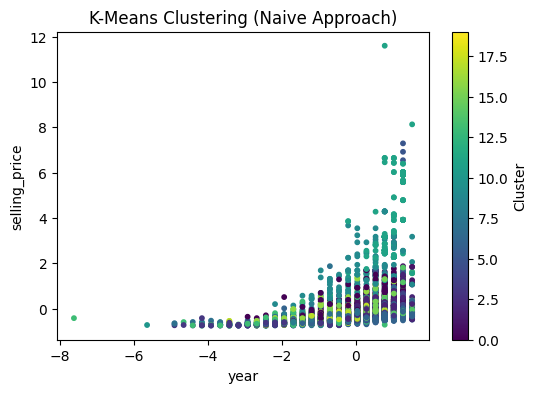

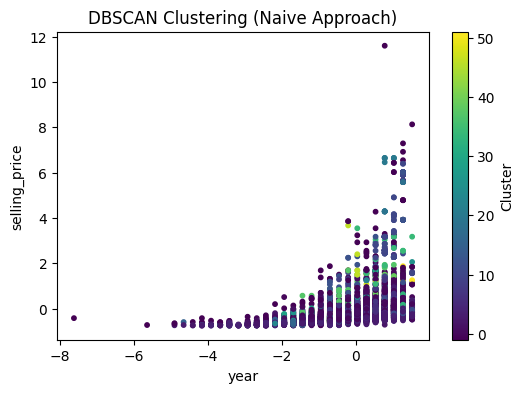

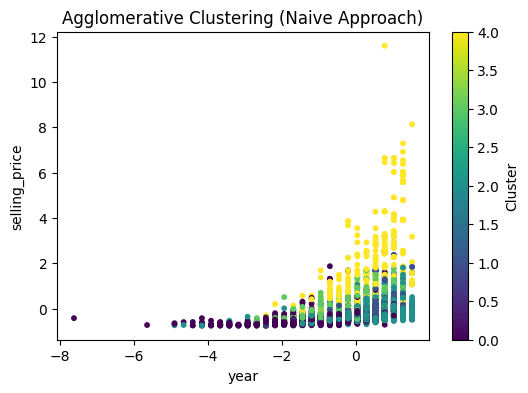

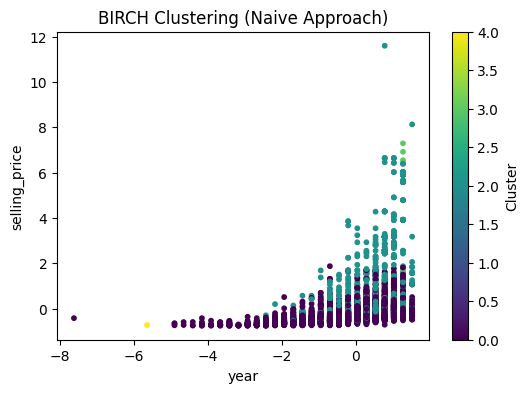

K-Means (Naive Approach):
  Silhouette Score: 0.37
  Adjusted Rand Index: 0.01
DBSCAN (Naive Approach):
  Silhouette Score: 0.31
  Adjusted Rand Index: 0.01
Agglomerative (Naive Approach):
  Silhouette Score: 0.22
  Adjusted Rand Index: 0.01
BIRCH (Naive Approach):
  Silhouette Score: 0.29
  Adjusted Rand Index: 0.00


In [109]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
data = XX

naive_results = {}
algorithms = {
    "K-Means": KMeans(n_clusters=20, random_state=42),
    "DBSCAN": DBSCAN(eps=1.5, min_samples=5),
    "Agglomerative": AgglomerativeClustering(n_clusters=5),
    "BIRCH": Birch(n_clusters=5, threshold=0.5),
}

for name, model in algorithms.items():
    labels = model.fit_predict(data)
    silhouette = silhouette_score(data, labels) if len(np.unique(labels)) > 1 else np.nan
    ari = adjusted_rand_score(data["selling_price"], labels)
    naive_results[name] = {"Silhouette Score": silhouette, "Adjusted Rand Index": ari}

    plt.figure(figsize=(6, 4))
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap="viridis", s=10)
    plt.title(f"{name} Clustering (Naive Approach)")
    plt.colorbar(label="Cluster")
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])
    plt.show()

for method, scores in naive_results.items():
    print(f"{method} (Naive Approach):")
    for metric, value in scores.items():
        print(f"  {metric}: {value:.2f}")


## Нормализация

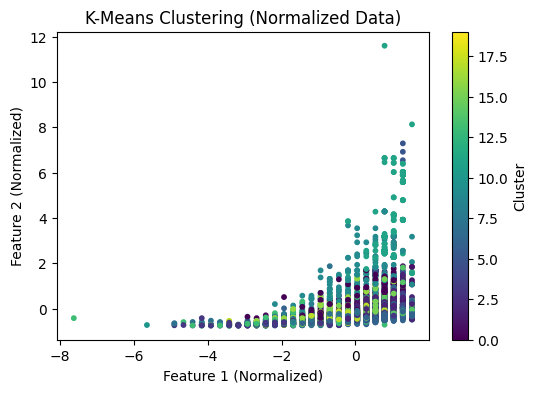

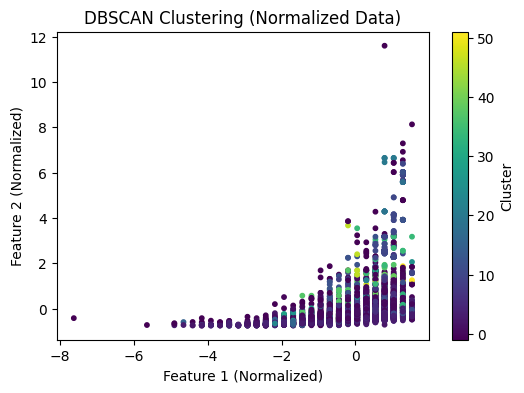

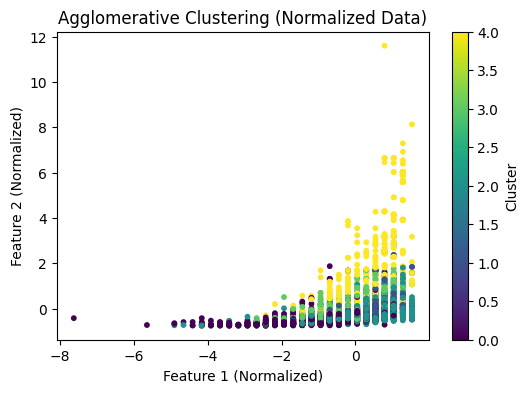

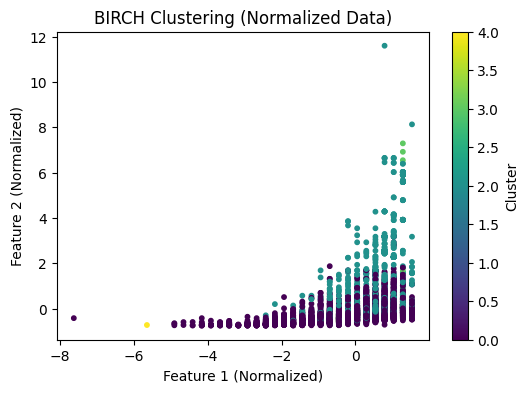

K-Means (Normalized Data):
  Silhouette Score: 0.37
  Adjusted Rand Index: 0.01
DBSCAN (Normalized Data):
  Silhouette Score: 0.31
  Adjusted Rand Index: 0.01
Agglomerative (Normalized Data):
  Silhouette Score: 0.22
  Adjusted Rand Index: 0.01
BIRCH (Normalized Data):
  Silhouette Score: 0.29
  Adjusted Rand Index: 0.00


In [112]:
scaler = StandardScaler()
data_normalized_only = scaler.fit_transform(data)
normalized_results = {}

for name, model in algorithms.items():
    labels = model.fit_predict(data_normalized_only)
    silhouette = silhouette_score(data_normalized_only, labels) if len(np.unique(labels)) > 1 else np.nan
    ari = adjusted_rand_score(data["selling_price"], labels)
    normalized_results[name] = {"Silhouette Score": silhouette, "Adjusted Rand Index": ari}

    plt.figure(figsize=(6, 4))
    plt.scatter(data_normalized_only[:, 0], data_normalized_only[:, 1], c=labels, cmap="viridis", s=10)
    plt.title(f"{name} Clustering (Normalized Data)")
    plt.colorbar(label="Cluster")
    plt.xlabel("Feature 1 (Normalized)")
    plt.ylabel("Feature 2 (Normalized)")
    plt.show()

for method, scores in normalized_results.items():
    print(f"{method} (Normalized Data):")
    for metric, value in scores.items():
        print(f"  {metric}: {value:.2f}")

## Без слабо-коррелированных данных

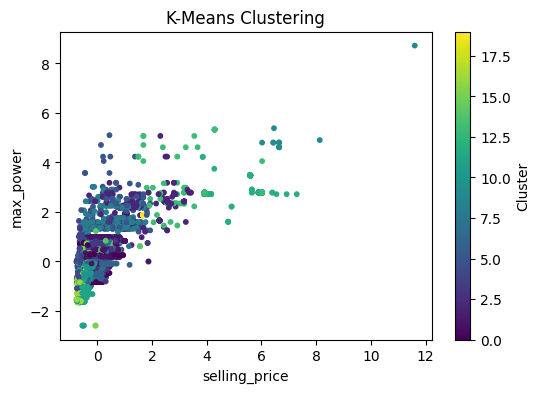

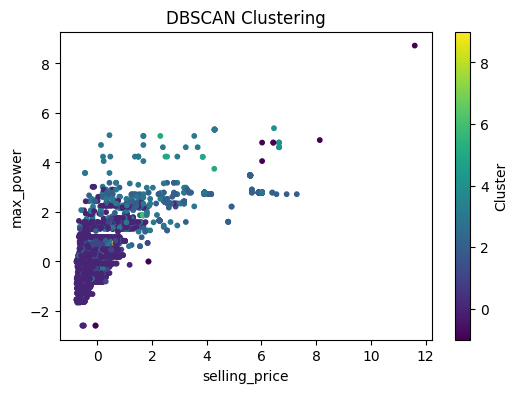

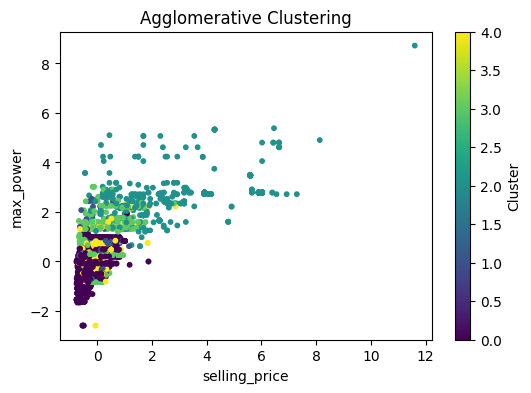

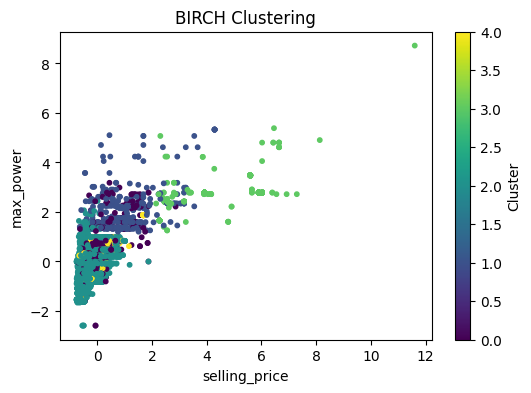

K-Means:
  Silhouette Score: 0.37
  Adjusted Rand Index: 0.02
DBSCAN:
  Silhouette Score: 0.35
  Adjusted Rand Index: 0.00
Agglomerative:
  Silhouette Score: 0.43
  Adjusted Rand Index: 0.00
BIRCH:
  Silhouette Score: 0.44
  Adjusted Rand Index: 0.01


In [116]:
correlations = data.corr()["selling_price"].sort_values(ascending=False)
selected_features = correlations[correlations.abs() > 0.3].index
data_selected = data[selected_features]

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_selected)

no_low_corr_results = {}

for name, model in algorithms.items():
    labels = model.fit_predict(data_normalized)
    silhouette = silhouette_score(data_normalized, labels) if len(np.unique(labels)) > 1 else np.nan
    ari = adjusted_rand_score(data["selling_price"], labels)
    no_low_corr_results[name] = {"Silhouette Score": silhouette, "Adjusted Rand Index": ari}

    plt.figure(figsize=(6, 4))
    plt.scatter(data_normalized[:, 0], data_normalized[:, 1], c=labels, cmap="viridis", s=10)
    plt.title(f"{name} Clustering")
    plt.colorbar(label="Cluster")
    plt.xlabel(selected_features[0])
    plt.ylabel(selected_features[1])
    plt.show()

for method, scores in no_low_corr_results.items():
    print(f"{method}:")
    for metric, value in scores.items():
        print(f"  {metric}: {value:.2f}")


## Понижение размерности

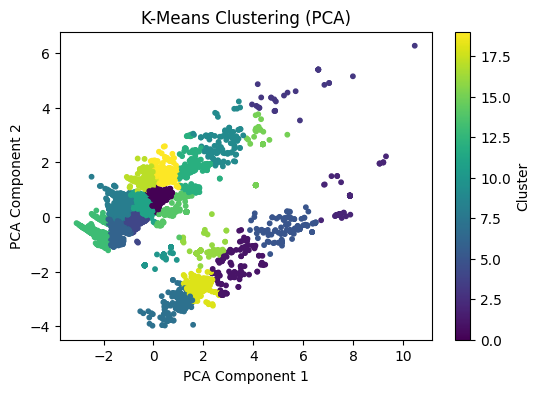

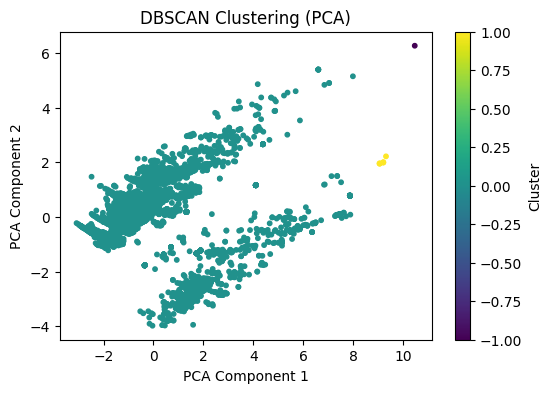

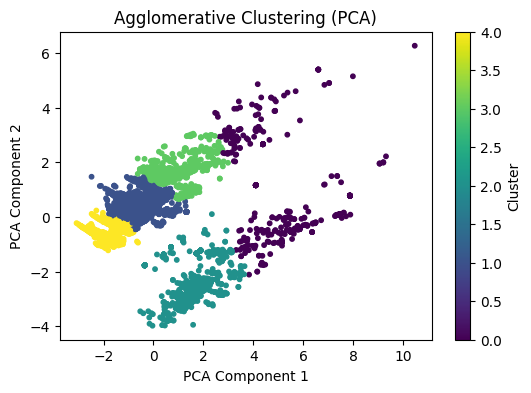

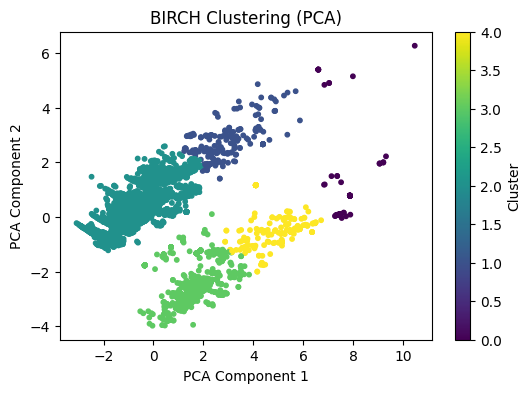

K-Means (PCA):
  Silhouette Score: 0.39
  Adjusted Rand Index: 0.03
DBSCAN (PCA):
  Silhouette Score: 0.72
  Adjusted Rand Index: 0.00
Agglomerative (PCA):
  Silhouette Score: 0.40
  Adjusted Rand Index: 0.01
BIRCH (PCA):
  Silhouette Score: 0.62
  Adjusted Rand Index: 0.00


In [118]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized)
results_pca = {}

for name, model in algorithms.items():
    labels = model.fit_predict(data_pca)
    silhouette = silhouette_score(data_pca, labels) if len(np.unique(labels)) > 1 else np.nan
    ari = adjusted_rand_score(data["selling_price"], labels)
    results_pca[name] = {"Silhouette Score": silhouette, "Adjusted Rand Index": ari}

    plt.figure(figsize=(6, 4))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap="viridis", s=10)
    plt.title(f"{name} Clustering (PCA)")
    plt.colorbar(label="Cluster")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

for method, scores in results_pca.items():
    print(f"{method} (PCA):")
    for metric, value in scores.items():
        print(f"  {metric}: {value:.2f}")


## Выводы

In [119]:
all_results = {
    "Naive Approach": naive_results,
    "Normalized Data": normalized_results,
    "High-Correlation Features": no_low_corr_results,
    "PCA Reduced Data": results_pca,
}

df_results = pd.DataFrame()
for approach, results in all_results.items():
    for algorithm, metrics in results.items():
        df_results = pd.concat(
            [
                df_results,
                pd.DataFrame(
                    {
                        "Approach": [approach],
                        "Algorithm": [algorithm],
                        "Silhouette Score": [metrics.get("Silhouette Score", float("nan"))],
                        "Adjusted Rand Index": [metrics.get("Adjusted Rand Index", float("nan"))],
                    }
                ),
            ],
            ignore_index=True,
        )

df_results_sorted = df_results.sort_values(by="Adjusted Rand Index", ascending=False)
df_results_sorted

,Approach,Algorithm,Silhouette Score,Adjusted Rand Index
12,PCA Reduced Data,K-Means,0.394229,0.026578
8,High-Correlation Features,K-Means,0.365631,0.022635
0,Naive Approach,K-Means,0.368261,0.014035
4,Normalized Data,K-Means,0.368261,0.014035
1,Naive Approach,DBSCAN,0.310199,0.011088
5,Normalized Data,DBSCAN,0.310199,0.011088
14,PCA Reduced Data,Agglomerative,0.402198,0.008144
2,Naive Approach,Agglomerative,0.224423,0.007310
6,Normalized Data,Agglomerative,0.224423,0.007310
11,High-Correlation Features,BIRCH,0.436693,0.005503
